#### 1. Importing Necessary Libraries

In [108]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import sklearn
import scipy
import seaborn as sns



#### 2. Importing the Dataset

In [109]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='vKXOY6MsDo8jJ0d52yvei6s8TlHNa3mbCdH1j1c1CYHD',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'rainfallmodelprediction-donotdelete-pr-8uhs2k5edcz8mv'
object_key = 'weather.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


#### 3. Analyse the data

In [110]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

#### 3. Analyse the data

In [112]:
data.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [114]:
data_c=data[["RainToday","WindGustDir","WindDir9am","WindDir3pm"]]

In [115]:
data.drop(columns=["Evaporation","Sunshine","Cloud9am","Cloud3pm"],axis=1,inplace=True)
data.drop(columns=["RainToday","WindGustDir","WindDir9am","WindDir3pm"],axis=1,inplace=True)

In [116]:
data['MinTemp'].fillna(data['MinTemp'].mean(),inplace=True)
data['MaxTemp'].fillna(data['MaxTemp'].mean(),inplace=True)
data['Rainfall'].fillna(data['Rainfall'].mean(),inplace=True)
data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean(),inplace=True)
data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean(),inplace=True)
data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean(),inplace=True)
data['Humidity3pm'].fillna(data['Humidity3pm'].mean(),inplace=True)
data['Humidity9am'].fillna(data['Humidity9am'].mean(),inplace=True)
data['Temp9am'].fillna(data['Temp9am'].mean(),inplace=True)
data['Temp3pm'].fillna(data['Temp3pm'].mean(),inplace=True)

In [117]:
c_names=data_c.columns

In [118]:
from sklearn.impute import SimpleImputer

In [119]:
imp_mode=SimpleImputer(missing_values=np.nan,strategy="most_frequent")

In [120]:
data_c=imp_mode.fit_transform(data_c)

In [121]:
data_c=pd.DataFrame(data_c,columns=c_names)

In [122]:
data_c.tail()

,RainToday,WindGustDir,WindDir9am,WindDir3pm
361,No,NNW,SSE,NW
362,No,N,NNW,NNW
363,No,ESE,ENE,ENE
364,No,NW,SSW,WNW
365,No,NW,NW,WNW


In [123]:
data.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,30.0,6.0,20,68,29,1019.7,1015.0,14.4,23.6,3.6,Yes
1,14.0,26.9,3.6,39.0,4.0,17,80,36,1012.4,1008.4,17.5,25.7,3.6,Yes
2,13.7,23.4,3.6,85.0,6.0,6,82,69,1009.5,1007.2,15.4,20.2,39.8,Yes
3,13.3,15.5,39.8,54.0,30.0,24,62,56,1005.5,1007.0,13.5,14.1,2.8,Yes
4,7.6,16.1,2.8,50.0,20.0,28,68,49,1018.3,1018.5,11.1,15.4,0.0,No


In [124]:
data=pd.concat([data,data_c],axis=1)

In [125]:
data.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow,RainToday,WindGustDir,WindDir9am,WindDir3pm
0,8.0,24.3,0.0,30.0,6.0,20,68,29,1019.7,1015.0,14.4,23.6,3.6,Yes,No,NW,SW,NW
1,14.0,26.9,3.6,39.0,4.0,17,80,36,1012.4,1008.4,17.5,25.7,3.6,Yes,Yes,ENE,E,W
2,13.7,23.4,3.6,85.0,6.0,6,82,69,1009.5,1007.2,15.4,20.2,39.8,Yes,Yes,NW,N,NNE
3,13.3,15.5,39.8,54.0,30.0,24,62,56,1005.5,1007.0,13.5,14.1,2.8,Yes,Yes,NW,WNW,W
4,7.6,16.1,2.8,50.0,20.0,28,68,49,1018.3,1018.5,11.1,15.4,0.0,No,Yes,SSE,SSE,ESE


#### 5. Data Visualization

#### 6. Splitting The Dateset Into Dependent And Independent Variable

In [126]:
from sklearn.preprocessing import StandardScaler

In [127]:
data = data[data['RainTomorrow'].notnull()]

In [128]:
data['Pressure9am'].fillna(data['Pressure9am'].mean(),inplace=True)
data['Pressure3pm'].fillna(data['Pressure3pm'].mean(),inplace=True)

In [129]:
y=data['RainTomorrow']
x=data.drop('RainTomorrow',axis=1)

In [130]:
set(y)

{'No', 'Yes'}

In [131]:
{'No', 'Yes'}

{'No', 'Yes'}

In [132]:
names=x.columns

In [133]:
names

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RISK_MM', 'RainToday',
       'WindGustDir', 'WindDir9am', 'WindDir3pm'],
      dtype='object')

In [134]:
sc=StandardScaler()

In [135]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [136]:
print(len(x),len(y))

366 366


#### 7. Label Encoding

In [137]:
## RainToday	WindGustDir	WindDir9am	WindDir3pm

LE = LabelEncoder()
x['Rainfall'] = LE.fit_transform(x['Rainfall'])
x.head()

LE = LabelEncoder()
x['RainToday'] = LE.fit_transform(x['RainToday'])
x.head()

LE = LabelEncoder()
x['WindGustDir'] = LE.fit_transform(x['WindGustDir'])
x.head()

LE = LabelEncoder()
x['WindDir9am'] = LE.fit_transform(x['WindDir9am'])
x.head()

LE = LabelEncoder()
x['WindDir3pm'] = LE.fit_transform(x['WindDir3pm'])
x.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM,RainToday,WindGustDir,WindDir9am,WindDir3pm
0,8.0,24.3,0,30.0,6.0,20,68,29,1019.7,1015.0,14.4,23.6,3.6,0,7,12,7
1,14.0,26.9,16,39.0,4.0,17,80,36,1012.4,1008.4,17.5,25.7,3.6,1,1,0,13
2,13.7,23.4,16,85.0,6.0,6,82,69,1009.5,1007.2,15.4,20.2,39.8,1,7,3,5
3,13.3,15.5,46,54.0,30.0,24,62,56,1005.5,1007.0,13.5,14.1,2.8,1,7,14,13
4,7.6,16.1,13,50.0,20.0,28,68,49,1018.3,1018.5,11.1,15.4,0.0,1,10,10,2


In [138]:
LE = LabelEncoder()
y=pd.DataFrame(y)
y = LE.fit_transform(y)

In [139]:
print(len(x),len(y))

366 366


In [140]:
sc=StandardScaler()

In [141]:
x=sc.fit_transform(x)

In [142]:
x[:5]

array([[ 1.22047135e-01,  5.61221296e-01, -4.35226892e-01,
        -7.56614508e-01, -4.64338593e-01,  2.27663829e-01,
        -3.07606422e-01, -9.22225313e-01, -1.35035156e-03,
        -2.80219884e-01,  3.63059084e-01,  6.58867279e-01,
         5.14590764e-01, -4.69041576e-01,  1.57759793e-01,
         1.27317675e+00, -1.21658053e-01],
       [ 1.11912864e+00,  9.50363081e-01,  1.15373114e+00,
        -6.46354102e-02, -7.18644550e-01, -1.11515119e-01,
         6.07090535e-01, -5.06249740e-01, -1.09464408e+00,
        -1.30180025e+00,  9.14353031e-01,  9.75548781e-01,
         5.14590764e-01,  2.13200716e+00, -1.23917773e+00,
        -1.90578418e+00,  1.20092158e+00],
       [ 1.06927456e+00,  4.26518370e-01,  1.15373114e+00,
         3.47214664e+00, -4.64338593e-01, -1.35517126e+00,
         7.59540028e-01,  1.45477796e+00, -1.52896624e+00,
        -1.48754214e+00,  5.40895841e-01,  1.46144846e-01,
         9.09274370e+00,  2.13200716e+00,  1.57759793e-01,
        -1.11104395e+00, -5.6

In [146]:
x=data.iloc[:,1:7].values

In [147]:
x.shape

(366, 6)

In [148]:
print(x)

[[24.3  0.  30.   6.  20.  68. ]
 [26.9  3.6 39.   4.  17.  80. ]
 [23.4  3.6 85.   6.   6.  82. ]
 ...
 [19.9  0.  43.  11.   9.  63. ]
 [26.9  0.  46.   6.  28.  69. ]
 [30.2  0.  78.  31.  35.  43. ]]


In [149]:
y=data.iloc[:,-1:].values
y.shape

(366, 1)

#### 8. Splitting The Data Into Train And Test

In [41]:
from sklearn import model_selection

In [42]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.2,random_state=0)

# Build the Model

### 9. Training And Testing The Model

In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score,classification_report,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
# create a regressor object
dtregressor = DecisionTreeRegressor(random_state = 0)

# fit the regressor with X and Y data
dtregressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [45]:
# predicting with regression model with X and Y
y_train_pred=dtregressor.predict(x_train)
y_test_pred=dtregressor.predict(x_test)

In [46]:
#Mean Squared Error and r2 Score
print("MSE",mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred))
print((r2_score(y_train,y_train_pred),(r2_score(y_test_pred,y_test))))

MSE 0.0 0.0
(1.0, 1.0)


In [47]:
acc=[]
model=[]

In [48]:
#Accuracy Score
model.append('Decision Tree')
acc.append(dtregressor.score(x_test,y_test))
print(dtregressor.score(x_test,y_test))

1.0


## Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression  

In [50]:
# create a regressor object
lregressor= LinearRegression()  

# fit the regressor with X and Y data
lregressor.fit(x_train, y_train) 

LinearRegression()

In [51]:
# predicting with regression model with X and Y
y_train_pred=lregressor.predict(x_train)
y_test_pred=lregressor.predict(x_test)

In [52]:
#Mean Squared Error and r2 Score
print("MSE",mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred))
print((r2_score(y_train,y_train_pred),(r2_score(y_test_pred,y_test))))

MSE 0.06624289712730357 0.05801933684029285
(0.5541063882006465, 0.1403942899297672)


In [53]:
#Accuracy Score
model.append('Linear Regression')
acc.append(lregressor.score(x_test,y_test))
print(lregressor.score(x_test,y_test))

0.599351969057448


## Random Forest

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [91]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=10)

In [93]:
x

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM,RainToday,WindGustDir,WindDir9am,WindDir3pm
0,0.122047,0.561221,-0.435227,-0.756615,-0.464339,0.227664,-0.307606,-0.922225,-0.001350,-0.280220,0.363059,0.658867,0.514591,-0.469042,0.157760,1.273177,-0.121658
1,1.119129,0.950363,1.153731,-0.064635,-0.718645,-0.111515,0.607091,-0.506250,-1.094644,-1.301800,0.914353,0.975549,0.514591,2.132007,-1.239178,-1.905784,1.200922
2,1.069275,0.426518,1.153731,3.472147,-0.464339,-1.355171,0.759540,1.454778,-1.528966,-1.487542,0.540896,0.146145,9.092744,2.132007,0.157760,-1.111044,-0.562518
3,1.002802,-0.755874,4.133027,1.088663,2.587333,0.679902,-0.764955,0.682252,-2.128031,-1.518499,0.203006,-0.773740,0.325018,2.132007,0.157760,1.803004,1.200922
4,0.055575,-0.666072,0.855802,0.781117,1.315803,1.132141,-0.307606,0.266276,-0.211023,0.261527,-0.223802,-0.577699,-0.338485,2.132007,0.856229,0.743350,-1.223808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.288227,1.519109,-0.435227,2.780168,-0.337186,3.619453,-2.594349,-1.754176,-0.540509,-0.930316,1.430080,1.623992,-0.338485,-0.469042,-0.075063,0.743350,-0.121658
362,-0.027515,1.174868,-0.435227,0.627344,-0.972951,0.114604,-2.060776,-1.338201,0.043580,0.013871,0.861002,1.352551,-0.338485,-0.469042,-0.773532,-0.316304,-0.342088
363,0.869858,-0.097326,-0.435227,0.242911,0.171426,-1.015992,-0.688730,0.147426,0.642645,0.927102,0.380843,-0.140377,-0.338485,-0.469042,-1.006355,-1.640871,-1.444238
364,0.869858,0.950363,-0.435227,0.473571,-0.464339,1.132141,-0.231382,-0.327974,0.193346,-0.094478,0.612031,1.005709,-0.338485,-0.469042,0.157760,1.008263,1.421352


In [151]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [55]:
# create a regressor object
forest=RandomForestRegressor()

# fit the regressor with X and Y data
forest.fit(x_train,y_train)

RandomForestRegressor()

In [56]:
# predicting with regression model with X and Y
y_train_pred=forest.predict(x_train)
y_test_pred=forest.predict(x_test)

In [57]:
#Mean Squared Error and r2 Score
print("MSE",mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred))
print((r2_score(y_train,y_train_pred),(r2_score(y_test_pred,y_test))))

MSE 0.00013424657534246578 0.0002648648648648649
(0.9990963606220888, 0.9981341757157772)


In [58]:
#Accuracy Score
model.append('Random Forest')
acc.append(forest.score(x_test,y_test))
print(forest.score(x_test,y_test))

0.9981709962168979


In [59]:
RFC=RandomForestClassifier()
GBC=GradientBoostingClassifier()

In [60]:
np.any(np.isnan(x))

False

In [61]:
GBC.fit(x_train,y_train)

GradientBoostingClassifier()

In [62]:
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [63]:
p1=RFC.predict(x_train)

In [64]:
p2=RFC.predict(x_test)

### 10. Model Evaluation

In [71]:
import sklearn.metrics as metrics

In [72]:
data={'Algorithms':model,'Accuracy':acc}
AC=pd.DataFrame(data)
AC

,Algorithms,Accuracy
0,Decision Tree,1.000000
1,Linear Regression,0.599352
2,Random Forest,0.998171


In [73]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithms'>

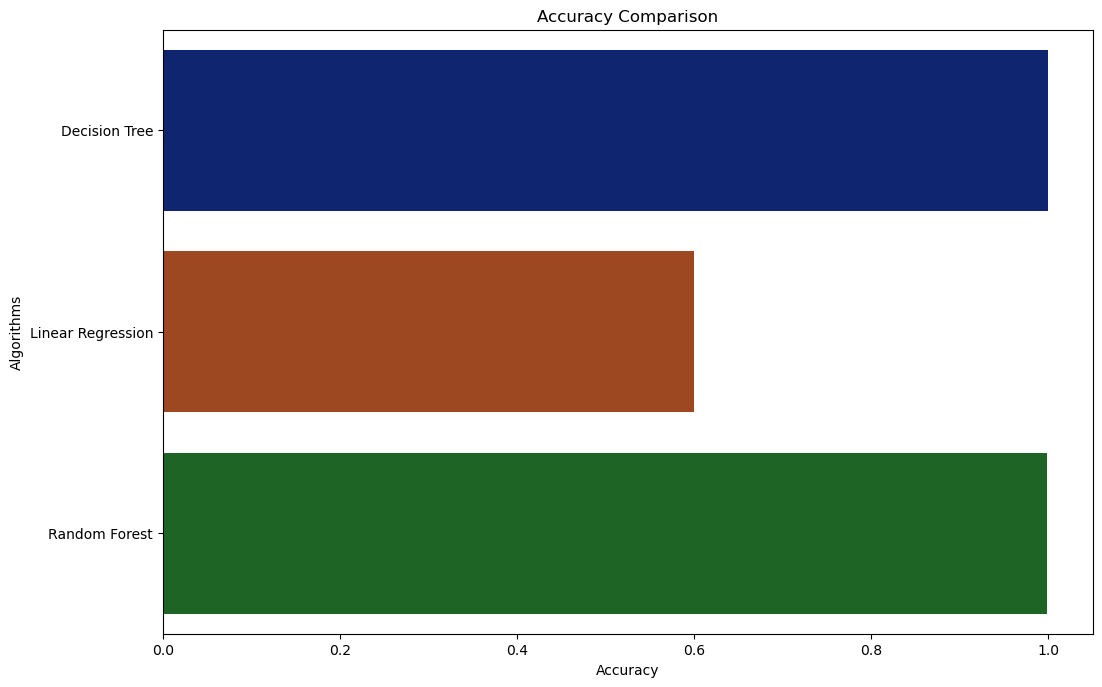

In [74]:
plt.figure(figsize=[12,8],dpi=100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithms')
sns.barplot(x=acc,y=model,palette='dark')

In [75]:
print(metrics.accuracy_score(y_train,p1))

1.0


In [76]:
print(metrics.accuracy_score(y_test,p2))

1.0


11. Save The Model

In [77]:
import pickle

In [78]:
pickle.dump(RFC,open('rainfall.pkl','wb'))
pickle.dump(LE,open('encoder.pkl','wb'))
pickle.dump(imp_mode,open('imputer.pkl','wb'))
pickle.dump(sc,open('scale.pkl','wb'))

In [79]:
!pip install ibm_watson_machine_learning

In [211]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
                  "url":"https://us-south.ml.cloud.ibm.com",
                  "apikey":"dRe32OTFMluCZqk6qFtDz95jkqS8FbBK4TrAuw7TgqR4"
}
client = APIClient(wml_credentials)

In [212]:
def guid_from_space_name(client,space_name):
    space = client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']['name']==space_name)['metadata']['id'])

In [213]:
space_uid = guid_from_space_name(client,'rainfall')
print("Space UID = "+ space_uid)

Space UID = b7d7d69a-9d0e-483c-a3a1-6a0661dc8e50


In [214]:
client.set.default_space(space_uid)

'SUCCESS'

In [215]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [203]:
import sklearn
sklearn.__version__

'1.0.2'

In [204]:
software_spec_uid = client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
#software_spec_uid = client.software_specifications.get_uid_by_name("default_py3.6")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [216]:
model_details = client.repository.store_model(model=forest,meta_props={
    client.repository.ModelMetaNames.NAME:"rainfall",
    client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0	",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid}
                                             )
model_id=client.repository.get_model_id(model_details)

In [217]:
model_details = client.repository.store_model(
    model=forest, 
    meta_props=meta_props, 
    training_data=x_train, 
    training_target=y_train
)

In [218]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'l1',
  'schemas': {'input': [{'fields': [{'name': 'f0', 'type': 'float'},
      {'name': 'f1', 'type': 'float'},
      {'name': 'f2', 'type': 'float'},
      {'name': 'f3', 'type': 'float'},
      {'name': 'f4', 'type': 'float'},
      {'name': 'f5', 'type': 'float'},
      {'name': 'f6', 'type': 'float'},
      {'name': 'f7', 'type': 'float'},
      {'name': 'f8', 'type': 'float'},
      {'name': 'f9', 'type': 'float'},
      {'name': 'f10', 'type': 'float'},
      {'name': 'f11', 'type': 'float'},
      {'name': 'f12', 'type': 'float'},
      {'name': 'f13', 'type': 'float'},
      {'name': 'f14', 'type': 'float'},
      {'name': 'f15', 'type': 'float'},
      {'name': 'f16', 'type': 'float'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-1

In [219]:
model_id

'6a0cd223-aa36-402d-a1d7-2b7569676191'

In [220]:
x_train[0]

array([ 0.99687647,  1.59572549, -0.43298392,  0.52859289, -0.66744276,
        0.96831037, -0.10571556, -0.94066966, -1.10344695, -1.24260319,
        1.29744307,  1.69572779, -0.32708431, -0.46547467,  2.08648021,
       -1.11404792,  1.37314389])

In [221]:
forest.predict([[ 0.99687647,  1.59572549, -0.43298392,  0.52859289, -0.66744276,
        0.96831037, -0.10571556, -0.94066966, -1.10344695, -1.24260319,
        1.29744307,  1.69572779, -0.32708431, -0.46547467,  2.08648021,
       -1.11404792,  1.37314389]])

array([0.])